In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
evaluation_data = pd.read_csv('./results/results_09_04_2024_19_10_29.csv')

# Results Analysis

In [3]:
evaluation_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
print(len(evaluation_data))
evaluation_data.tail(10)

1500


,Algorithm,Instance,Number of States,Extracted Number of States,RunNumber,Time(s),LastTokenQuery,EquivalenceQuery,Tree Depth,Inner Nodes,Accuracy_in_target,Accuracy_anywhere,IsEquivalentExact,IsEquivalentOmitZero,IsMinimal
1490,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,1,334.080285,688989,72,16,16,1.0,1.0,True,True,True
1491,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,2,335.863449,688989,72,16,16,1.0,1.0,True,True,True
1492,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,3,334.376774,688989,72,16,16,1.0,1.0,True,True,True
1493,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,4,334.983923,688989,72,16,16,1.0,1.0,True,True,True
1494,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,5,339.801847,688989,72,16,16,1.0,1.0,True,True,True
1495,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,6,335.539221,688989,72,16,16,1.0,1.0,True,True,True
1496,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,7,336.278840,688989,72,16,16,1.0,1.0,True,True,True
1497,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,8,337.365689,688989,72,16,16,1.0,1.0,True,True,True
1498,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,9,337.097750,688989,72,16,16,1.0,1.0,True,True,True
1499,QuantNaryTreeLearner_Standard_Teacher_exact_te...,random_PDFA_nominal_size_0_98_9,501,501,10,334.838432,688989,72,16,16,1.0,1.0,True,True,True


In [5]:
evaluation_data.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time(s)', 'LastTokenQuery',
       'EquivalenceQuery', 'Tree Depth', 'Inner Nodes', 'Accuracy_in_target',
       'Accuracy_anywhere', 'IsEquivalentExact', 'IsEquivalentOmitZero',
       'IsMinimal'],
      dtype='object')

In [6]:
evaluation_data['Algorithm'].value_counts()

QuantNaryTreeLearner_Omit_Zero_Transitions_exact_teacher    500
QuantNaryTreeLearner_Teacher_Filter_exact                   500
QuantNaryTreeLearner_Standard_Teacher_exact_teacher         500
Name: Algorithm, dtype: int64

In [7]:
def get_prob(x):
    splitted = x.split('_')
    return float("0."+splitted[5])

evaluation_data['Zero_Probability'] = evaluation_data['Instance'].apply(lambda x: get_prob(x))

In [8]:
import math

evaluation_data['TREE_SIZE'] = evaluation_data['Inner Nodes']+evaluation_data['Extracted Number of States']

In [9]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    res = Q3 - Q1
    return res

cols_to_agg = ['Time(s)', 'LastTokenQuery', 'EquivalenceQuery', 'Extracted Number of States', 'Accuracy_in_target', 'Accuracy_anywhere', 'TREE_SIZE']
funcs =  ['median', IQR]  
names = ['median', 'IQR']  
grouped_multiple = evaluation_data.groupby(['Algorithm', 'Zero_Probability']).agg({x:funcs for x in cols_to_agg})
col_names = [x+"_"+fun_name for x in cols_to_agg for fun_name in names]
grouped_multiple.columns = col_names
#grouped_multiple.columns = ['Time(s)_median','Time(s)_IQR', 'MembershipQuery_median', 'MembershipQuery_IQR', 
#'EquivalenceQuery_median', 'EquivalenceQuery_IQR', 'Extracted Number of States_median', 'Extracted Number of States_IQR',]
grouped_multiple.reset_index(inplace = True)

In [10]:
evaluation_data.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time(s)', 'LastTokenQuery',
       'EquivalenceQuery', 'Tree Depth', 'Inner Nodes', 'Accuracy_in_target',
       'Accuracy_anywhere', 'IsEquivalentExact', 'IsEquivalentOmitZero',
       'IsMinimal', 'Zero_Probability', 'TREE_SIZE'],
      dtype='object')

In [11]:
evaluation_data_exact = evaluation_data[evaluation_data["Algorithm"].apply(lambda x: 'exact' in str(x))]
evaluation_data_sampling =  evaluation_data[evaluation_data["Algorithm"].apply(lambda x: 'exact' not in str(x))]

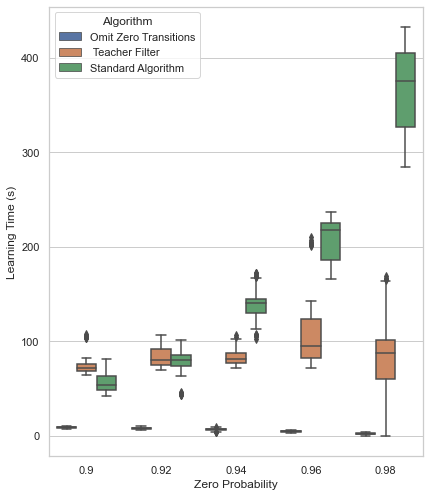

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="Zero_Probability", y="Time(s)", hue="Algorithm",
                 data=evaluation_data_exact)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.set_xlabel("Zero Probability", fontsize = 12)
ax.set_ylabel("Learning Time (s)", fontsize = 12)
new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(ax.get_legend().get_texts(), new_labels):
    t.set_text(l)

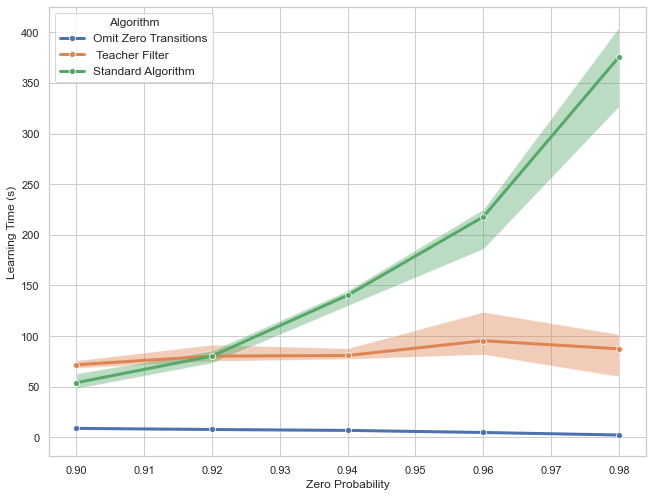

In [13]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.set_style("whitegrid")
# Compute quartiles
quartiles = evaluation_data_exact.groupby(['Algorithm', 'Zero_Probability'])['Time(s)'].quantile([0.25, 0.5, 0.75]).unstack(level=0)

# Calculate means
means = evaluation_data_exact.groupby(['Algorithm', 'Zero_Probability'])['Time(s)'].median().unstack(level=0)

# Plot quartiles with error bars
for algo in evaluation_data_exact['Algorithm'].unique():
    sns.lineplot(data=means[algo], marker='o', label=algo, linewidth = 3)
    #plt.errorbar(x=means.index, y=means[algo], yerr=[means[algo] - quartiles[algo].loc[:,0.25], quartiles[algo].loc[:,0.75] - means[algo]], fmt='o')
    plt.fill_between(x=means.index, y1=quartiles[algo].loc[:,0.25], y2= quartiles[algo].loc[:,0.75], alpha = 0.4)

plt.legend(title='Algorithm', fontsize=12, frameon=True, loc = 'upper left')
plt.xlabel("Zero Probability", fontsize=12)
plt.ylabel("Learning Time (s)", fontsize=12)

new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(plt.gca().get_legend().get_texts(), new_labels):
    t.set_text(l)

plt.show()

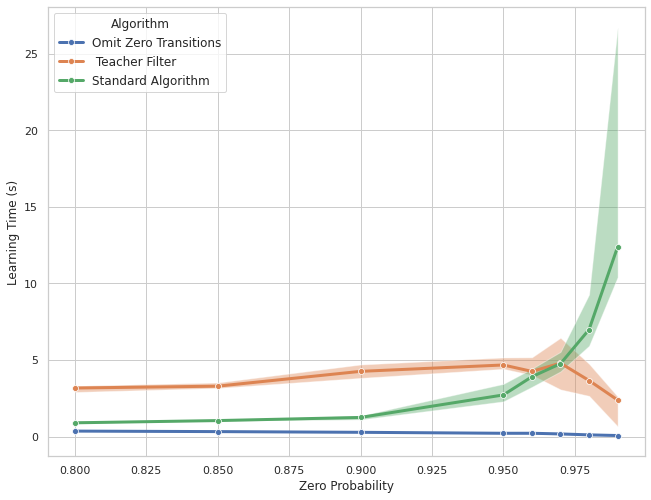

In [37]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.set_style("whitegrid")
evaluation_data_exact_reduced = evaluation_data_exact[evaluation_data_exact['Zero_Probability']>=0.8]
# Compute quartiles
quartiles = evaluation_data_exact_reduced.groupby(['Algorithm', 'Zero_Probability'])['Time(s)'].quantile([0.25, 0.5, 0.75]).unstack(level=0)

# Calculate means
means = evaluation_data_exact_reduced.groupby(['Algorithm', 'Zero_Probability'])['Time(s)'].median().unstack(level=0)

# Plot quartiles with error bars
for algo in evaluation_data_exact['Algorithm'].unique():
    sns.lineplot(data=means[algo], marker='o', label=algo, linewidth = 3)
    #plt.errorbar(x=means.index, y=means[algo], yerr=[means[algo] - quartiles[algo].loc[:,0.25], quartiles[algo].loc[:,0.75] - means[algo]], fmt='o')
    plt.fill_between(x=means.index, y1=quartiles[algo].loc[:,0.25], y2= quartiles[algo].loc[:,0.75], alpha = 0.4)

plt.legend(title='Algorithm', fontsize=12, frameon=True, loc = 'upper left')
plt.xlabel("Zero Probability", fontsize=12)
plt.ylabel("Learning Time (s)", fontsize=12)

new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(plt.gca().get_legend().get_texts(), new_labels):
    t.set_text(l)

plt.show()

In [32]:
evaluation_data_exact["IsEquivalentOmitZero"].value_counts()

True    7200
Name: IsEquivalentOmitZero, dtype: int64

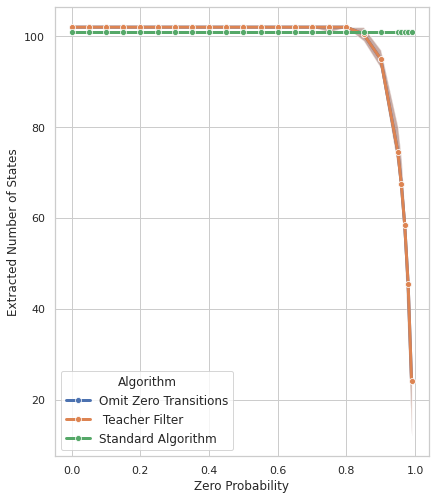

In [33]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
#ax = sns.boxplot(x="Zero_Probability", y="Extracted Number of States", hue="Algorithm",
#                 data=evaluation_data_exact)

# Compute quartiles
quartiles = evaluation_data_exact.groupby(['Algorithm', 'Zero_Probability'])['Extracted Number of States'].quantile([0.25, 0.5, 0.75]).unstack(level=0)

# Calculate means
means = evaluation_data_exact.groupby(['Algorithm', 'Zero_Probability'])['Extracted Number of States'].median().unstack(level=0)

# Plot quartiles with error bars
for algo in evaluation_data_exact['Algorithm'].unique():
    sns.lineplot(data=means[algo], marker='o', label=algo, linewidth = 3)
    #plt.errorbar(x=means.index, y=means[algo], yerr=[means[algo] - quartiles[algo].loc[:,0.25], quartiles[algo].loc[:,0.75] - means[algo]], fmt='o')
    plt.fill_between(x=means.index, y1=quartiles[algo].loc[:,0.25], y2= quartiles[algo].loc[:,0.75], alpha = 0.4)

plt.legend(title='Algorithm', fontsize=12, frameon=True, loc = 'lower left')
plt.xlabel("Zero Probability", fontsize = 12)
plt.ylabel("Extracted Number of States", fontsize = 12)
new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(plt.gca().get_legend().get_texts(), new_labels):
    t.set_text(l)


In [48]:
evaluation_data_exact.columns

Index(['Algorithm', 'Instance', 'Number of States',
       'Extracted Number of States', 'RunNumber', 'Time(s)', 'LastTokenQuery',
       'EquivalenceQuery', 'Tree Depth', 'Inner Nodes', 'Accuracy_in_target',
       'Accuracy_anywhere', 'IsEquivalentExact', 'IsEquivalentOmitZero',
       'IsMinimal', 'Zero_Probability', 'TREE_SIZE'],
      dtype='object')

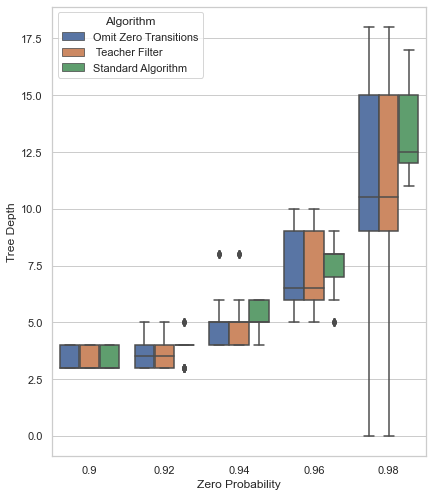

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="Zero_Probability", y="Tree Depth", hue="Algorithm",
                 data=evaluation_data_exact)

ax.set_xlabel("Zero Probability", fontsize = 12)
ax.set_ylabel("Tree Depth", fontsize = 12)
new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(ax.get_legend().get_texts(), new_labels):
    t.set_text(l)

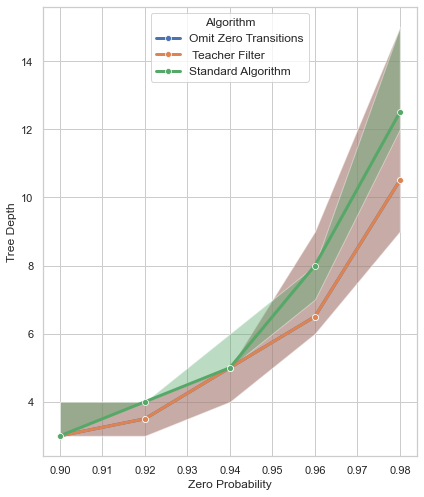

In [15]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
#ax = sns.boxplot(x="Zero_Probability", y="EquivalenceQuery", hue="Algorithm",
#                 data=evaluation_data_exact)

quartiles = evaluation_data_exact.groupby(['Algorithm', 'Zero_Probability'])['Tree Depth'].quantile([0.25, 0.5, 0.75]).unstack(level=0)

# Calculate means
means = evaluation_data_exact.groupby(['Algorithm', 'Zero_Probability'])['Tree Depth'].median().unstack(level=0)

# Plot quartiles with error bars
for algo in evaluation_data_exact['Algorithm'].unique():
    sns.lineplot(data=means[algo], marker='o', label=algo, linewidth = 3)
    #plt.errorbar(x=means.index, y=means[algo], yerr=[means[algo] - quartiles[algo].loc[:,0.25], quartiles[algo].loc[:,0.75] - means[algo]], fmt='o')
    plt.fill_between(x=means.index, y1=quartiles[algo].loc[:,0.25], y2= quartiles[algo].loc[:,0.75], alpha = 0.4)

plt.legend(title='Algorithm', fontsize=12, frameon=True, loc = 'upper center')
plt.xlabel("Zero Probability", fontsize = 12)
plt.ylabel("Tree Depth", fontsize = 12)
new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(plt.gca().get_legend().get_texts(), new_labels):
    t.set_text(l)

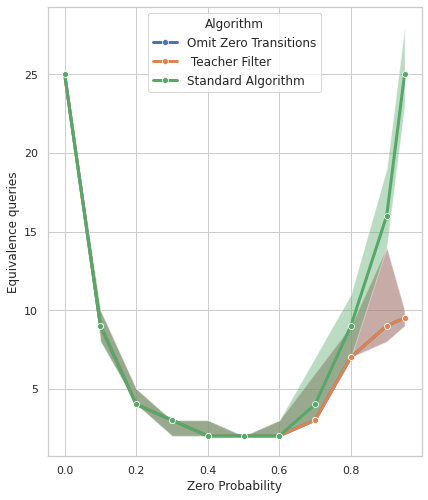

In [32]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
#ax = sns.boxplot(x="Zero_Probability", y="EquivalenceQuery", hue="Algorithm",
#                 data=evaluation_data_exact)

quartiles = evaluation_data_exact.groupby(['Algorithm', 'Zero_Probability'])['EquivalenceQuery'].quantile([0.25, 0.5, 0.75]).unstack(level=0)

# Calculate means
means = evaluation_data_exact.groupby(['Algorithm', 'Zero_Probability'])['EquivalenceQuery'].median().unstack(level=0)

# Plot quartiles with error bars
for algo in evaluation_data_exact['Algorithm'].unique():
    sns.lineplot(data=means[algo], marker='o', label=algo, linewidth = 3)
    #plt.errorbar(x=means.index, y=means[algo], yerr=[means[algo] - quartiles[algo].loc[:,0.25], quartiles[algo].loc[:,0.75] - means[algo]], fmt='o')
    plt.fill_between(x=means.index, y1=quartiles[algo].loc[:,0.25], y2= quartiles[algo].loc[:,0.75], alpha = 0.4)

plt.legend(title='Algorithm', fontsize=12, frameon=True, loc = 'upper center')
plt.xlabel("Zero Probability", fontsize = 12)
plt.ylabel("Equivalence queries", fontsize = 12)
new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(plt.gca().get_legend().get_texts(), new_labels):
    t.set_text(l)


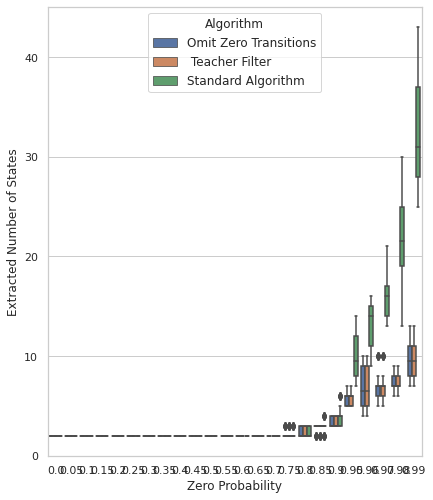

In [35]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.boxplot(x="Zero_Probability", y="EquivalenceQuery", hue="Algorithm",
                 data=evaluation_data_exact)

plt.legend(title='Algorithm', fontsize=12, frameon=True, loc = 'upper center')
ax.set_xlabel("Zero Probability", fontsize = 12)
ax.set_ylabel("Extracted Number of States", fontsize = 12)
new_labels = ["Omit Zero Transitions"," Teacher Filter","Standard Algorithm"]
for t, l in zip(ax.get_legend().get_texts(), new_labels):
    t.set_text(l)


In [13]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
pivot = int(len(grouped_multiple)/5)

zero = np.array(grouped_multiple["Time(s)_median"][0:pivot])
standard = np.array(grouped_multiple["Time(s)_median"][pivot:2*pivot])
teacher_filter = np.array(grouped_multiple["Time(s)_median"][2*pivot:])

speedup_filter_vs_zero = teacher_filter/zero
speedup_standard_vs_zero = standard / zero

sns.set_style("whitegrid")
ax = sns.regplot(x=grouped_multiple['Number of States'][0:pivot], y=speedup_filter_vs_zero, order=1, ci=None, label="Teacher Filter vs Omit Zero")
ax = sns.regplot(x=grouped_multiple['Number of States'][0:pivot], y=speedup_standard_vs_zero, order=1, ci=None, label="Standard Teacher vs Omit Zero")
ax.set_xlabel("Actual Target Size", fontsize = 12)
ax.set_ylabel("Speedup", fontsize = 12)
ax.legend()

ValueError: operands could not be broadcast together with shapes (78,) (26,) 

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(4.631875000000001, 0.5, 'Accuracy in target median')

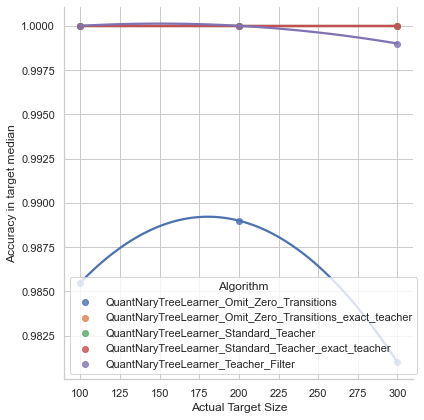

In [24]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="Accuracy_in_target_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, order = 2, ci=None, size = 6)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Accuracy in target median", fontsize = 12)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(22.96, 0.5, 'Accuracy anywhere median')

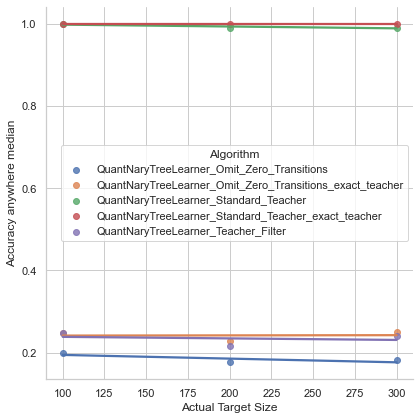

In [26]:
import seaborn as sns
#sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="Accuracy_anywhere_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, order = 1, ci=None, size = 6)
#plt.legend(title = 'Algorithm', labels=["QuaNT","$\mathrm{L_{P}^*}$"], fontsize = 12, frameon=True)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Accuracy anywhere median", fontsize = 12)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

In [38]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="Extracted Number of States_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


KeyError: "['Nominal_Size'] not in index"

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


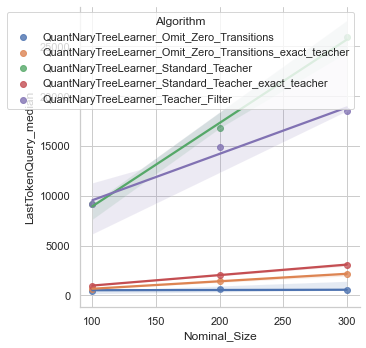

In [28]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="LastTokenQuery_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)

c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\franz\anaconda3\envs\pymodelextractor_exp\lib\site-packages\seaborn\regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(19.96, 0.5, 'Tree Size Median')

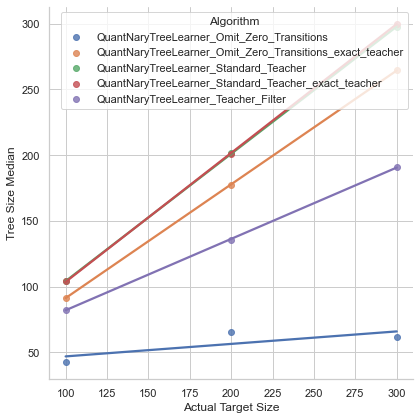

In [30]:
import seaborn as sns
sns.set(rc={'figure.figsize':(6.7,8.27)})
sns.set_style("whitegrid")
ax = sns.lmplot(x="Nominal_Size", y="TREE_SIZE_median", hue="Algorithm",
                 data=grouped_multiple, legend = True, legend_out = False, ci = None, size = 6)
ax.axes[0,0].set_xlabel("Actual Target Size", fontsize = 12)
ax.axes[0,0].set_ylabel("Tree Size Median", fontsize = 12)
#new_labels = ["Omit Zero Transitions","Standard Teacher","Teacher Filter"]
#for t, l in zip(ax._legend.texts, new_labels):
#    t.set_text(l)